# Xavier Initialization vs He Initialization
## 1. 개요
- Initialization 의 방법에 따라, 학습률과 학습된 모델의 성능을 비교해보고자 합니다.
- MNIST data 를 이용하여, 같은 깊이와 노드 수를 가진 신경망이 Initialization 에 따라 어떤 차이를 보이는지 실험해 보겠습니다.

## 2. Import Packages and Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

In [2]:
mnist_train = datasets.MNIST(root="data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="data/", train=False, transform=transforms.ToTensor(), download=True)

## 3. Modeling

- 비교해볼 모델은 다음과 같습니다.    
1. Weight Initialization 을 해주지 않은 Linear
    - Initialization 을 해주지 않았을 때 pytorch는 아래코드와 같이 uniform distribution 으로 initialize를 하는 것을 확인할 수 있습니다.
2. Xavier Normal Initialization 을 해준 Linear
3. Xavier Uniform Initialization 을 해준 Linear
4. He Normal Initialization 을 해준 Linear
5. He Uniform Initialization 을 해준 Linear


```python
def reset_parameters(self):
    stdv = 1. / math.sqrt(self.weight.size(1))
    self.weight.data.uniform_(-stdv, stdv)
    if self.bias is not None:
        self.bias.data.uniform_(-stdv, stdv)
```



In [3]:
class NoInitialize(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256, bias=True)
        self.linear2 = nn.Linear(256, 128, bias=True)
        self.linear3 = nn.Linear(128, 10, bias=True)
        
    def forward(self, x):
        output1 = torch.relu(self.linear1(x))
        output2 = torch.relu(self.linear2(output1))
        output3 = self.linear3(output2)
        return output3

In [4]:
class XavierNormal(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256, bias=True)
        self.linear2 = nn.Linear(256, 128, bias=True)
        self.linear3 = nn.Linear(128, 10, bias=True)
        
        nn.init.xavier_normal_(self.linear1.weight)
        nn.init.xavier_normal_(self.linear2.weight)
        nn.init.xavier_normal_(self.linear3.weight)
        

    def forward(self, x):
        output1 = torch.relu(self.linear1(x))
        output2 = torch.relu(self.linear2(output1))
        output3 = self.linear3(output2)
        return output3

In [5]:
class XavierUniform(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256, bias=True)
        self.linear2 = nn.Linear(256, 128, bias=True)
        self.linear3 = nn.Linear(128, 10, bias=True)
        
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)
        

    def forward(self, x):
        output1 = torch.relu(self.linear1(x))
        output2 = torch.relu(self.linear2(output1))
        output3 = self.linear3(output2)
        return output3

In [6]:
class HeNormal(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256, bias=True)
        self.linear2 = nn.Linear(256, 128, bias=True)
        self.linear3 = nn.Linear(128, 10, bias=True)
        
        nn.init.kaiming_normal_(self.linear1.weight)
        nn.init.kaiming_normal_(self.linear2.weight)
        nn.init.kaiming_normal_(self.linear3.weight)
        

    def forward(self, x):
        output1 = torch.relu(self.linear1(x))
        output2 = torch.relu(self.linear2(output1))
        output3 = self.linear3(output2)
        return output3

In [7]:
class HeUniform(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256, bias=True)
        self.linear2 = nn.Linear(256, 128, bias=True)
        self.linear3 = nn.Linear(128, 10, bias=True)
        
        nn.init.kaiming_uniform_(self.linear1.weight)
        nn.init.kaiming_uniform_(self.linear2.weight)
        nn.init.kaiming_uniform_(self.linear3.weight)
        

    def forward(self, x):
        output1 = torch.relu(self.linear1(x))
        output2 = torch.relu(self.linear2(output1))
        output3 = self.linear3(output2)
        return output3

## 4. Train

In [8]:
models = []

no_initial = NoInitialize()
xavier_normal = XavierNormal()
xavier_uniform = XavierUniform()
he_normal = HeNormal()
he_uniform = HeUniform()

models.append(no_initial)
models.append(xavier_normal)
models.append(xavier_uniform)
models.append(he_normal)
models.append(he_uniform)
models

[NoInitialize(
   (linear1): Linear(in_features=784, out_features=256, bias=True)
   (linear2): Linear(in_features=256, out_features=128, bias=True)
   (linear3): Linear(in_features=128, out_features=10, bias=True)
 ), XavierNormal(
   (linear1): Linear(in_features=784, out_features=256, bias=True)
   (linear2): Linear(in_features=256, out_features=128, bias=True)
   (linear3): Linear(in_features=128, out_features=10, bias=True)
 ), XavierUniform(
   (linear1): Linear(in_features=784, out_features=256, bias=True)
   (linear2): Linear(in_features=256, out_features=128, bias=True)
   (linear3): Linear(in_features=128, out_features=10, bias=True)
 ), HeNormal(
   (linear1): Linear(in_features=784, out_features=256, bias=True)
   (linear2): Linear(in_features=256, out_features=128, bias=True)
   (linear3): Linear(in_features=128, out_features=10, bias=True)
 ), HeUniform(
   (linear1): Linear(in_features=784, out_features=256, bias=True)
   (linear2): Linear(in_features=256, out_features=1

In [9]:
batch_size = 100
lr = 0.001
epochs = 15

dataloader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

criterion = nn.CrossEntropyLoss()

total_batch = len(dataloader)

model_losses = []

for model in models:
    optimizer = optim.Adam(model.parameters(), lr=lr)
    total_loss = []
    for epoch in range(1, epochs + 1):
        
        avg_cost = 0
        for x_batch, y_batch in dataloader:
            x_batch = x_batch.view(-1, 784)
            y_hat = model(x_batch)
            loss = criterion(y_hat, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            avg_cost += loss / total_batch
        total_loss.append(avg_cost)
        if epoch % 5 == 0:
            print(model.__class__.__name__, ' - epoch : ', avg_cost)    
    model_losses.append(total_loss)
    
print("TRAINING DONE")

NoInitialize  - epoch :  tensor(0.0421, grad_fn=<AddBackward0>)
NoInitialize  - epoch :  tensor(0.0155, grad_fn=<AddBackward0>)
NoInitialize  - epoch :  tensor(0.0088, grad_fn=<AddBackward0>)
XavierNormal  - epoch :  tensor(0.0338, grad_fn=<AddBackward0>)
XavierNormal  - epoch :  tensor(0.0126, grad_fn=<AddBackward0>)
XavierNormal  - epoch :  tensor(0.0076, grad_fn=<AddBackward0>)
XavierUniform  - epoch :  tensor(0.0358, grad_fn=<AddBackward0>)
XavierUniform  - epoch :  tensor(0.0148, grad_fn=<AddBackward0>)
XavierUniform  - epoch :  tensor(0.0102, grad_fn=<AddBackward0>)
HeNormal  - epoch :  tensor(0.0333, grad_fn=<AddBackward0>)
HeNormal  - epoch :  tensor(0.0134, grad_fn=<AddBackward0>)
HeNormal  - epoch :  tensor(0.0064, grad_fn=<AddBackward0>)
HeUniform  - epoch :  tensor(0.0328, grad_fn=<AddBackward0>)
HeUniform  - epoch :  tensor(0.0136, grad_fn=<AddBackward0>)
HeUniform  - epoch :  tensor(0.0094, grad_fn=<AddBackward0>)
TRAINING DONE


## 5. Compare Training Loss

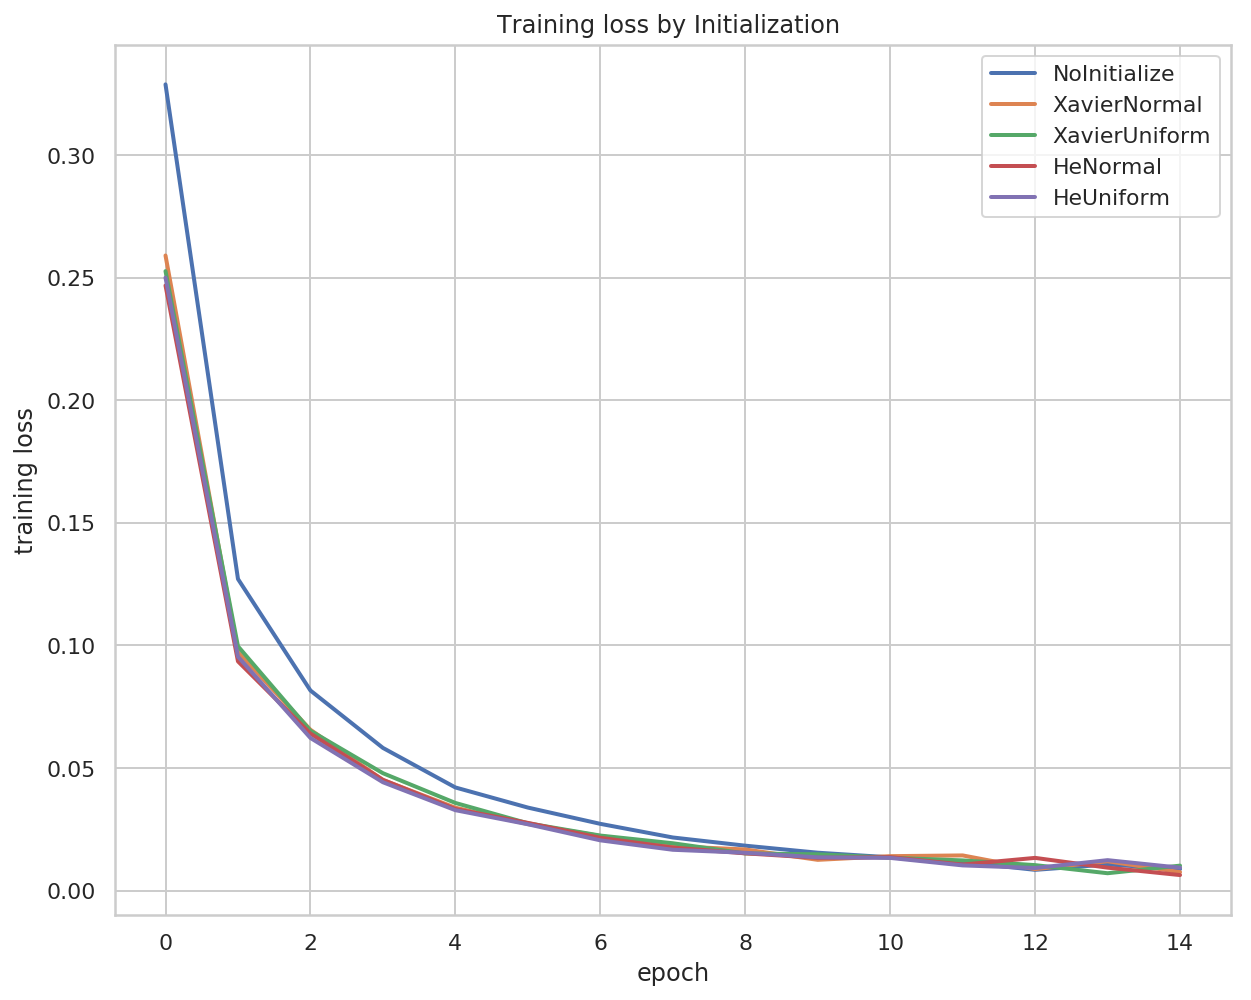

In [10]:
plt.figure(figsize=(10, 8))
for model, model_loss in list(zip(models, model_losses)):
    plt.plot(model_loss, label=model.__class__.__name__, linewidth=2)

plt.legend()
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.title("Training loss by Initialization ")
plt.show()

## 6. Compare Test Accuracy

In [11]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 784).float()
    y_test = mnist_test.test_labels

    for model in models:
        prediction = model(x_test)
        correct_prediction = torch.argmax(prediction, 1) == y_test
        accuracy = correct_prediction.float().mean()
        print(model.__class__.__name__, ' - Accuracy:', accuracy.item())

NoInitialize  - Accuracy: 0.9787999987602234
XavierNormal  - Accuracy: 0.980400025844574
XavierUniform  - Accuracy: 0.9803000092506409
HeNormal  - Accuracy: 0.974399983882904
HeUniform  - Accuracy: 0.9782999753952026


## 7. Conclusion
- 먼저, Training Loss 가 떨어지는 것을 보면, Default Initialization 보다, 나머지 Initialization 방법에서 더 좋은 성과가 있음을 확인 할 수 있습니다. Epoch 가 진행됨에 따라 더 안정적이고 빠르게 training loss 가 감소 하는 것을 볼 수 있습니다.
- 또한 Test set 에서의 accuracy 를 통해 Xavier Initialization 방법이 성능역시 뛰어난 것을 확인 할 수 있습니다. 이는 같은 epoch 동안에 training 시켰을 때, 초기화 하는 방법에 따라 학습률이 다르다는 것을 의미하는 것이기도 합니다.
- 하지만 이것이 절대적인 초기화 방법의 유리함을 의미하는 것이진 않습니다. 초기화 방법 역시, problemmatic 한 parameter의 한 종류 이므로, 문제마다 다양하게 시도해 봐야 합니다.